This is the script file that contains exploratory data analysis and two models that leverage historical energy consumption data from a single household to predict future consumption while incorporating seasonal patterns. Your goal is to run through the code, complete the TODO segments of code (including creating a model of your own), and provide meaningful results. Make sure that you upload the household_power_consumption_dataset.csv file to the storage before continuing.

In [1]:
# Import all packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
!pip install prophet
!pip install pmdarima
from prophet import Prophet
import numpy as np
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import seasonal_decompose
!pip install neuralprophet
from neuralprophet import NeuralProphet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 56.2 MB/s eta 0:00:00


ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('household_power_consumption_dataset.csv') # Update this file path to point to the dataset
df_copy = df.copy()
df.head()


,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
# Calculate mean and standard deviation of the required columns
columns_to_analyze = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

# Handle non-numeric values by converting them to NaN
df[columns_to_analyze] = df[columns_to_analyze].apply(pd.to_numeric, errors='coerce')

means = df[columns_to_analyze].mean()
std_devs = df[columns_to_analyze].std()

# Print the results
print("Mean of Different Columns:")
print(means)

print("\nStandard Deviation of Different Columns:")
print(std_devs)

print(df.describe(include='all'))

Mean of Different Columns:
Global_active_power        1.400264
Global_reactive_power      0.121508
Voltage                  240.720369
Global_intensity           5.923020
Sub_metering_1             1.205349
Sub_metering_2             1.829585
Sub_metering_3             6.611034
dtype: float64

Standard Deviation of Different Columns:
Global_active_power      1.298341
Global_reactive_power    0.112738
Voltage                  3.141472
Global_intensity         5.478759
Sub_metering_1           6.412824
Sub_metering_2           7.274617
Sub_metering_3           8.487417
dtype: float64
                  Date_Time  Global_active_power  Global_reactive_power  \
count                178861        178852.000000          178852.000000   
unique               178861                  NaN                    NaN   
top     2007-04-19 22:24:00                  NaN                    NaN   
freq                      1                  NaN                    NaN   
mean                    NaN         

In [4]:
# TODO: Create 2 different bar graphs - one graph to display the means and another for the standard deviations for the different columns.
# Note: You can use the means and std_devs variables to help.


Index(['Date_Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Index(['Date_Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
Data range: 0 to 178860


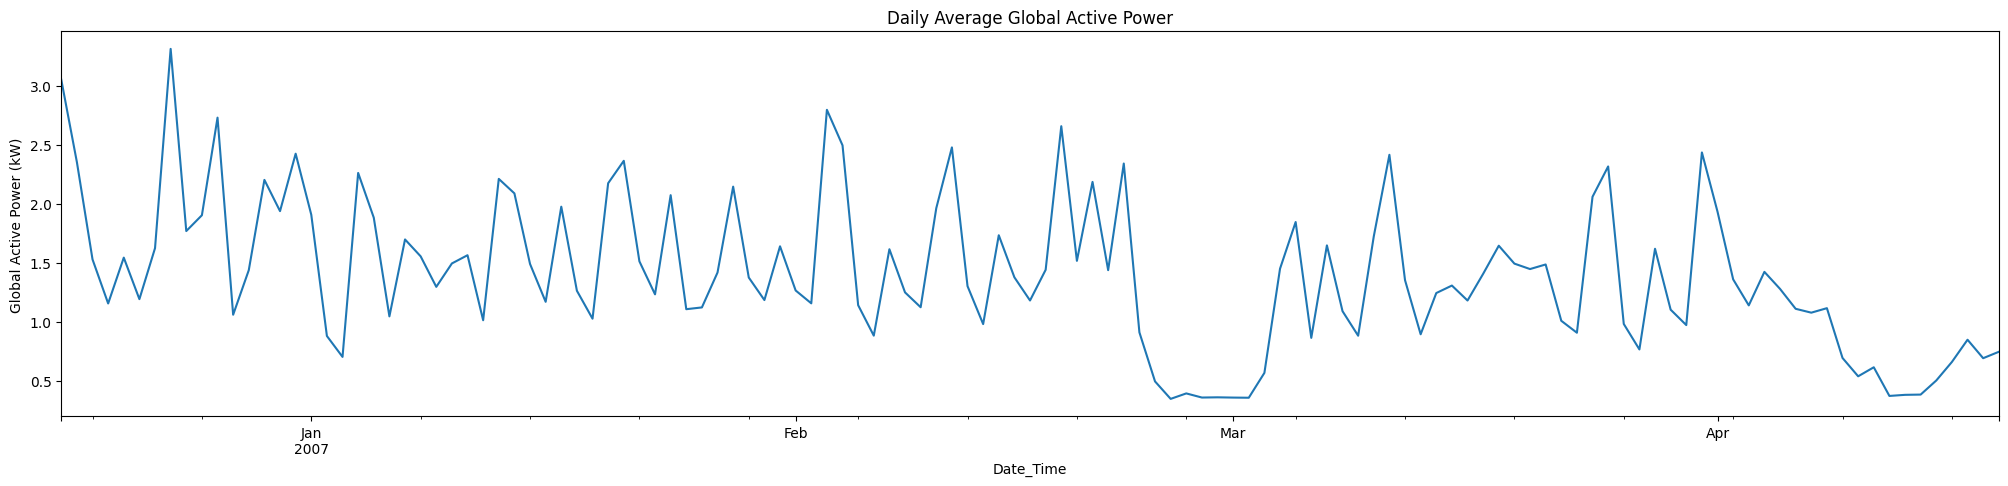

In [5]:
# Time series plot
print(df.columns)
print(df_copy.columns)
print("Data range:", df_copy.index.min(), "to", df_copy.index.max())

df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df_copy['Date_Time'] = pd.to_datetime(df_copy['Date_Time'])

df_copy[columns_to_analyze] = df_copy[columns_to_analyze].apply(pd.to_numeric, errors='coerce')

df_copy.set_index('Date_Time', inplace=True)
df_copy.resample('D')['Global_active_power'].mean().plot(figsize=(25, 5), title='Daily Average Global Active Power')
plt.ylabel('Global Active Power (kW)')
plt.show()


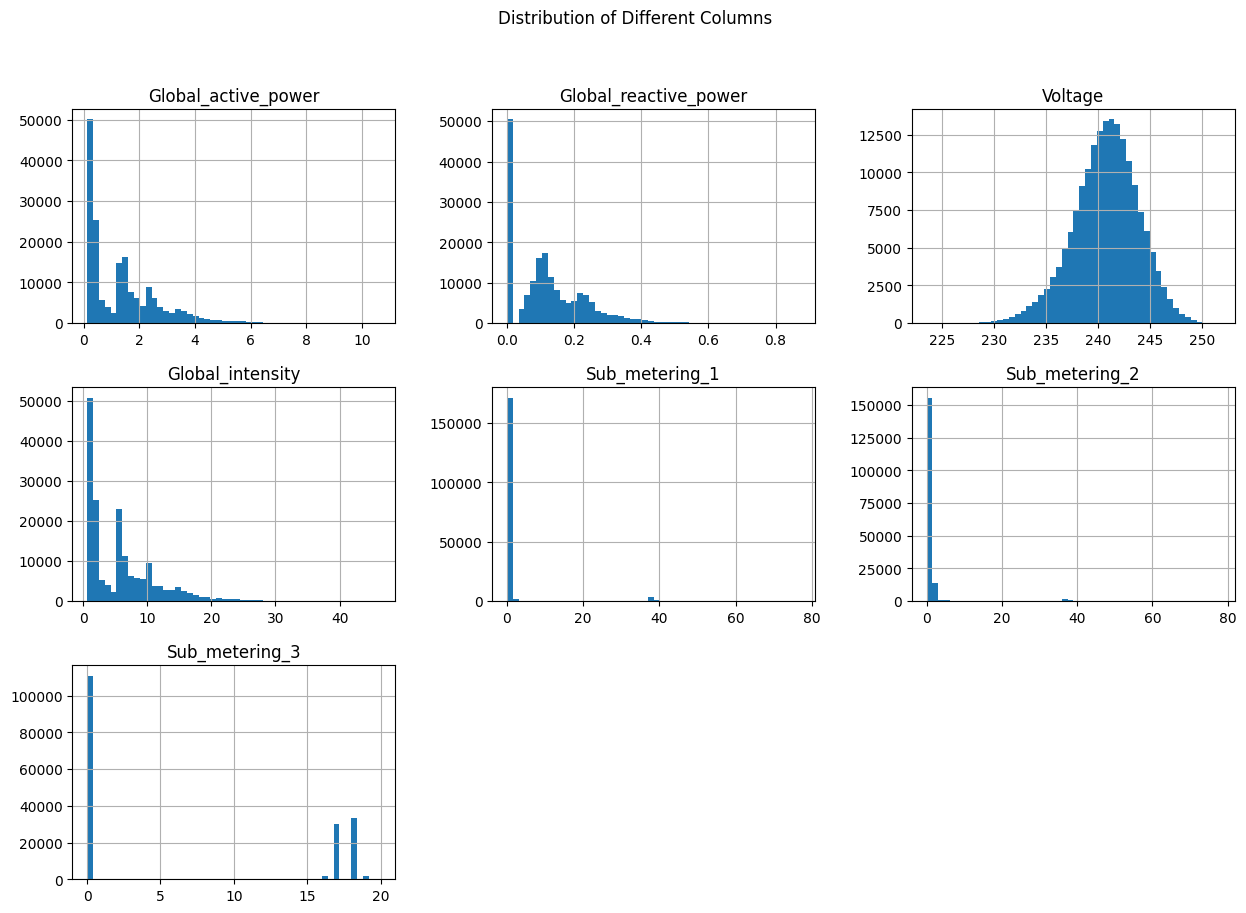

In [6]:
df[columns_to_analyze].hist(bins=50, figsize=(15, 10))
plt.suptitle('Distribution of Different Columns')
plt.show()


In [7]:
# TODO: Create a heatmap that displays the correlation values between the numerical columns (can use seaborn)


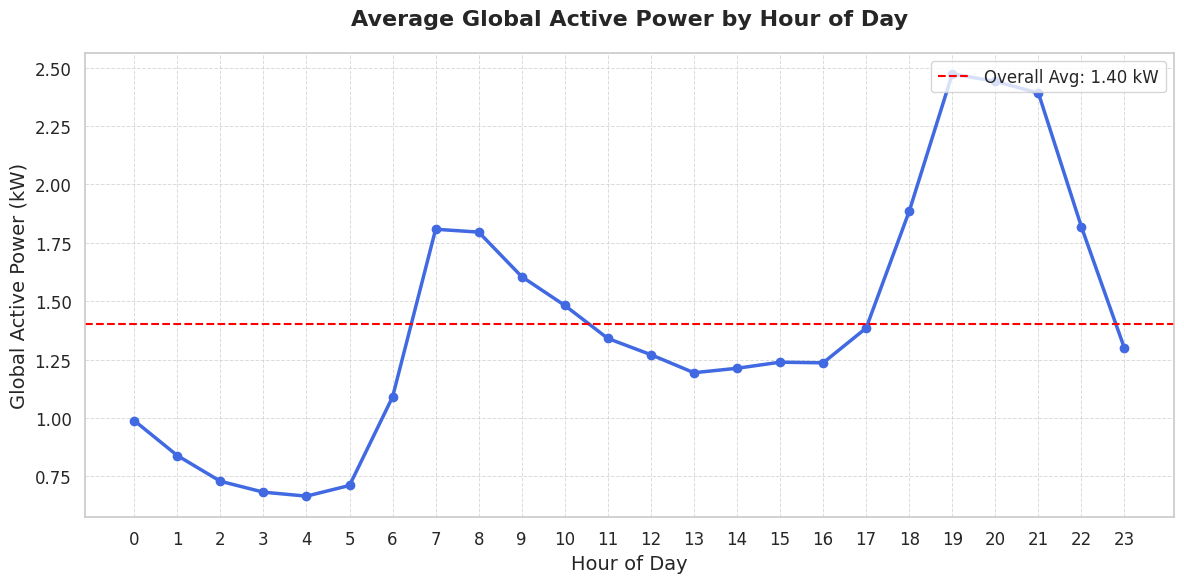

In [8]:
# Graph that plots the average global active power by hour of day

df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

# Now you can extract the hour without changing the index
df['hour'] = df['Date_Time'].dt.hour

# Plotting the average Global Active Power by hour of day
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('hour')['Global_active_power'].mean(), color='royalblue', linewidth=2.5, marker='o', markersize=6)

# Add titles and labels with custom font sizes
plt.title('Average Global Active Power by Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Global Active Power (kW)', fontsize=14)

# Customize ticks and grid
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a horizontal line for average value across all hours
avg_power = df['Global_active_power'].mean()
plt.axhline(avg_power, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {avg_power:.2f} kW')

# Add legend and improve layout
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
"""
Preprocessing step:
"""

# Convert Date_Time to datetime and set as index
print(df.columns)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.set_index('Date_Time', inplace=True)

# Set frequency to 1 minute ('T' for minute frequency)
df = df.asfreq('T')

# Drop Sub_metering columns that could create bias
df.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)

# Forward fill missing values
df.ffill(inplace=True)  # Updated to use ffill()

# Split data into train (80%) and test (20%) sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

df.to_csv('final_dataset.csv', index=False)

"""
Seasonal Naive and LSTM models developed here
"""

# Seasonal naive forecast (use last season's values as the forecast)
def seasonal_naive_forecast(train, test, seasonal_period):
    last_season = train['Global_active_power'][-seasonal_period:]
    forecast = np.tile(last_season.values, int(np.ceil(len(test) / seasonal_period)))[:len(test)]

    # Evaluation
    mse = mean_squared_error(test['Global_active_power'], forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(test['Global_active_power'], forecast)

    print(f'Seasonal Naive - MSE: {mse}, RMSE: {rmse}, R²: {r2}')

    model_metrics["Model"].append('Seasonal Naive')
    model_metrics["MSE"].append(mse)
    model_metrics["RMSE"].append(rmse)
    model_metrics["R2"].append(r2)

    return forecast


# Long Short-Term Memory (LSTM) Model
def fit_lstm(train, test):
    # Prepare data for LSTM
    def create_lstm_dataset(data, look_back=1):
        X, y = [], []
        for i in range(len(data) - look_back - 1):
            a = data[i:(i + look_back), 0]
            X.append(a)
            y.append(data[i + look_back, 0])
        return np.array(X), np.array(y)

    # Normalize the data for LSTM
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train[['Global_active_power']])
    test_scaled = scaler.transform(test[['Global_active_power']])

    look_back = 60  # Use last 60 time steps (minutes)
    X_train, y_train = create_lstm_dataset(train_scaled, look_back)
    X_test, y_test = create_lstm_dataset(test_scaled, look_back)

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Define LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    lstm_model.add(LSTM(50))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(1))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    lstm_model.fit(X_train, y_train, epochs=3, batch_size=256, verbose=1)

    # Make predictions
    lstm_predictions = lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)

    # Align LSTM predictions with test data
    actual_test = test['Global_active_power'].iloc[look_back+1:].values
    lstm_predictions = lstm_predictions[:len(actual_test)]  # Match lengths

    # Evaluate model
    mae = mean_absolute_error(actual_test, lstm_predictions)
    mse = mean_squared_error(actual_test, lstm_predictions)
    rmse = np.sqrt(mean_squared_error(actual_test, lstm_predictions))
    r2 = r2_score(actual_test, lstm_predictions)

    model_metrics["Model"].append('LSTM')
    model_metrics["MSE"].append(mse)
    model_metrics["RMSE"].append(rmse)
    model_metrics["R2"].append(r2)

    print(f'LSTM - MAE: {mae}, RMSE: {rmse}, R²: {r2}')
    return lstm_predictions

model_metrics = {
    "Model": [],
    "MSE": [],
    "RMSE": [],
    "R2": []
}

# Example usage
print("Seasonal Naive Model:")
seasonal_period = 43200
seasonal_forecast = seasonal_naive_forecast(train, test, seasonal_period)

print("="*50)

print("\nLSTM Model:")
lstm_forecast = fit_lstm(train, test)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-9-cba09cb4a488>:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.asfreq('T')

  df = df.asfreq('T')



Index(['Date_Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour'],
      dtype='object')
Seasonal Naive Model:
Seasonal Naive - MSE: 2.4552651559556087, RMSE: 1.5669285739801955, R²: -1.1475272713036393

LSTM Model:


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

  super().__init__(**kwargs)



Epoch 1/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0043
Epoch 2/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0016
Epoch 3/3
559/559 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0014
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
LSTM - MAE: 0.11950527950677199, RMSE: 0.3396646834883401, R²: 0.8991910369082085


In [17]:
# TODO:
"""
In the code above, we have went through the process of creating 2 different models (Seasonal Naive and LSTM).

Your goal is to create a new model that uses historical energy consumption data from the single household to predict future
consumption while incorporating seasonal patterns.

Report metrics including either Mean Squared Error (MSE) or Mean Average Error (MAE), Root Mean Square Error (RMSE), and R^2 (the correlation of determination).
Uncomment the code below to add the metrics to the data frame to be displayed and graphed in the following cell.
"""
def new_model(train, test):


    # model_metrics["Model"].append('Model_name')
    # model_metrics["MSE"].append(mse)
    # model_metrics["RMSE"].append(rmse)
    # model_metrics["R2"].append(r2)

    return None


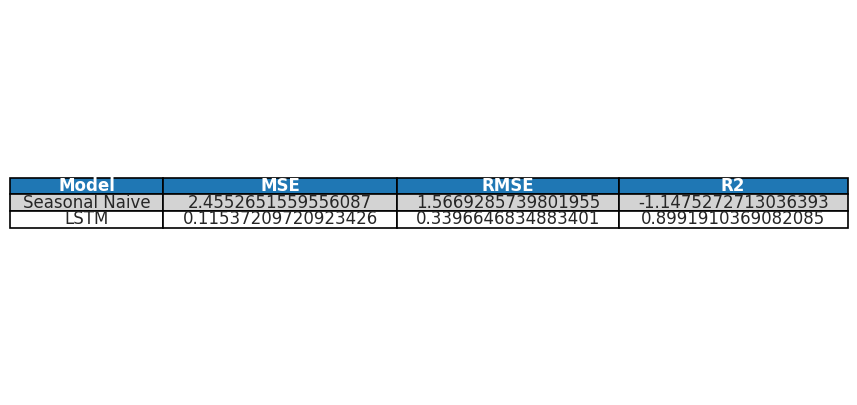

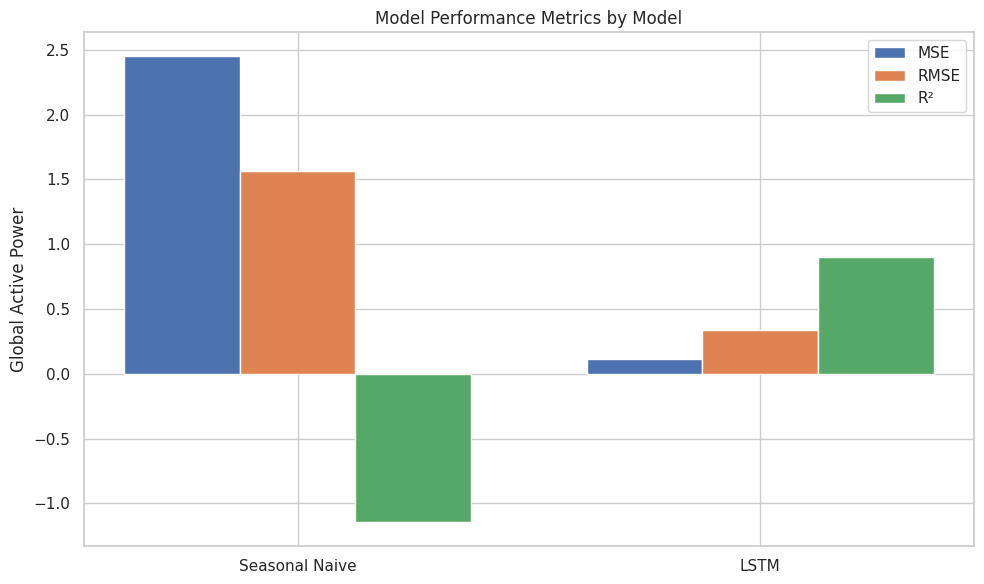

In [18]:
"""
This cell creates a table that displays the model metrics along with a graph below.
"""

# Create a DataFrame from model metrics
df_metrics = pd.DataFrame(model_metrics)

# Displaying the table as a figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center')

# Set the font size and column width
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df_metrics.columns))))

# Adding bold headers and a background color
for i, col in enumerate(df_metrics.columns):
    table[0, i].set_text_props(weight='bold', color='white')
    table[0, i].set_facecolor(colors.TABLEAU_COLORS["tab:blue"])

# Adjusting cell alignment and colors for readability
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor("black")
    cell.set_linewidth(1.2)
    if i == 0:  # Header row
        cell.set_text_props(fontweight="bold")
    else:  # Data cells
        cell.set_facecolor("white" if i % 2 == 0 else "lightgrey")

plt.show()

# Plot a grouped bar chart for each metric with the models on the x-axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and positions
bar_width = 0.25
x = range(len(df_metrics['Model']))

# Plot each metric as a separate bar
ax.bar([p - bar_width for p in x], df_metrics['MSE'], width=bar_width, label='MSE')
ax.bar(x, df_metrics['RMSE'], width=bar_width, label='RMSE')
ax.bar([p + bar_width for p in x], df_metrics['R2'], width=bar_width, label='R²')

# Adding labels and titles
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'])
ax.set_title('Model Performance Metrics by Model')
ax.set_ylabel('Global Active Power')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Converts the dataframe to csv and downloads it
df.to_csv('final_dataset.csv', index=False)
from google.colab import files
files.download('final_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>